In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn;
import sys;
from nltk.corpus import stopwords;
import nltk;
from gensim.models import ldamodel
import gensim.corpora;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle;
from datetime import datetime as dt

In [2]:
#load all the datasets that we will use
df=pd.read_csv(r"C:\Users\aslam\Downloads\all_articles_final.csv")
topics = pd.read_csv(r"C:\Users\aslam\Downloads\topics.csv")
channels = pd.read_csv(r"C:\Users\aslam\Downloads\channels.csv")
df.rename(columns={'Unnamed: 0':'article_id'},inplace=True)
df.head()

,article_id,Date,Media,Title,Article,Summary
0,0,1 month ago,CBS News,"Trump abruptly ends '60 Minutes' interview, ta...",President Donald Trump abruptly ended a taped ...,President Donald Trump abruptly ended a taped ...
1,1,2 weeks ago,CBS News,Trump Taunts Lesley Stahl of ‘60 Minutes’ Afte...,President Trump abruptly cut off an interview ...,President Trump abruptly cut off an interview ...
2,2,4 weeks ago,CBS News,Trump abruptly ends '60 Minutes' interview bef...,(CNN) President Donald Trump abruptly ended a ...,(CNN) President Donald Trump abruptly ended a ...
3,3,1 day ago,CBS News,"Barack Obama speaks out on politics, the presi...","""We all good? We got speed? Let's go!"" Almost ...",Almost four years after he left the White Hous...
4,4,"Jan 23, 2020",CBS News,CBS's New Star Trek Series Mirrors American Po...,Patrick Stewart makes his long-awaited return ...,Patrick Stewart makes his long-awaited return ...


In [3]:
df['biden']=False
df['trump']=False
df['republicans']=False
df['democrats']=False
df['relevant']=False
df.head()

,article_id,Date,Media,Title,Article,Summary,biden,trump,republicans,democrats,relevant
0,0,1 month ago,CBS News,"Trump abruptly ends '60 Minutes' interview, ta...",President Donald Trump abruptly ended a taped ...,President Donald Trump abruptly ended a taped ...,False,False,False,False,False
1,1,2 weeks ago,CBS News,Trump Taunts Lesley Stahl of ‘60 Minutes’ Afte...,President Trump abruptly cut off an interview ...,President Trump abruptly cut off an interview ...,False,False,False,False,False
2,2,4 weeks ago,CBS News,Trump abruptly ends '60 Minutes' interview bef...,(CNN) President Donald Trump abruptly ended a ...,(CNN) President Donald Trump abruptly ended a ...,False,False,False,False,False
3,3,1 day ago,CBS News,"Barack Obama speaks out on politics, the presi...","""We all good? We got speed? Let's go!"" Almost ...",Almost four years after he left the White Hous...,False,False,False,False,False
4,4,"Jan 23, 2020",CBS News,CBS's New Star Trek Series Mirrors American Po...,Patrick Stewart makes his long-awaited return ...,Patrick Stewart makes his long-awaited return ...,False,False,False,False,False


In [4]:
for i,k in enumerate(df['Title']):
    if ("biden" or "joe") in k.lower():
        df['biden'][i]=True
        df['relevant'][i]=True
    if ("trump" or "donald" or 'president') in k.lower():
        df['trump'][i]=True
        df['relevant'][i]=True

    if ('dems' or "democrats" or "left" or"democratic") in k.lower():
        df['democrats'][i]=True
        df['relevant'][i]=True

    if ("republicans" or "reps" or "right") in k.lower():
        df['republicans'][i]=True
        df['relevant'][i]=True


C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate

In [5]:
df.head()

,article_id,Date,Media,Title,Article,Summary,biden,trump,republicans,democrats,relevant
0,0,1 month ago,CBS News,"Trump abruptly ends '60 Minutes' interview, ta...",President Donald Trump abruptly ended a taped ...,President Donald Trump abruptly ended a taped ...,False,True,False,False,True
1,1,2 weeks ago,CBS News,Trump Taunts Lesley Stahl of ‘60 Minutes’ Afte...,President Trump abruptly cut off an interview ...,President Trump abruptly cut off an interview ...,False,True,False,False,True
2,2,4 weeks ago,CBS News,Trump abruptly ends '60 Minutes' interview bef...,(CNN) President Donald Trump abruptly ended a ...,(CNN) President Donald Trump abruptly ended a ...,False,True,False,False,True
3,3,1 day ago,CBS News,"Barack Obama speaks out on politics, the presi...","""We all good? We got speed? Let's go!"" Almost ...",Almost four years after he left the White Hous...,False,True,False,False,True
4,4,"Jan 23, 2020",CBS News,CBS's New Star Trek Series Mirrors American Po...,Patrick Stewart makes his long-awaited return ...,Patrick Stewart makes his long-awaited return ...,False,False,False,False,False


In [6]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from collections import Mapping
bloblist_desc = []

df_tweet_descr_str=df['Summary'].astype(str)
for row in df_tweet_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_tweet_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
df['Polarity']=df_tweet_polarity_desc['sentiment'] 

C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  after removing the cwd from sys.path.


In [7]:
import datetime
for i,k in enumerate(df['Date']): 
    k=k.replace(',','')
    k=k.replace('1 month ago',"Oct 18 2020")
    k=k.replace('4 weeks ago', "Oct 17 2020")
    k=k.replace('3 weeks ago', "Oct 24 2020")
    k=k.replace('2 weeks ago', "Nov 01 2020")
    k=k.replace('1 day ago', "Nov 17 2020")
    k=k.replace('1 week ago', "Nov 11 2020")
    k=k.replace('7 hours ago', "Nov 18 2020")
    k=k.replace('8 hours ago', "Nov 18 2020")
    k=k.replace('16 hours ago', "Nov 18 2020")
    k=k.replace('4 days ago', "Nov 14 2020")
    k=k.replace('6 days ago', "Nov 12 2020")
    k=k.replace('11 hours ago', "Nov 18 2020")
    k=k.replace('3 days ago', "Nov 15 2020")
    k=k.replace('1 day ago', "Nov 17 2020")
    k=k.replace('10 days ago', "Nov 08 2020")
    k=k.replace('2 days ago', "Nov 16 2020")
    k=k.replace('5 days ago', "Nov 13 2020")
    k=k.replace('7 days ago', "Nov 11 2020")
    k=k.replace('12 hours ago', "Nov 11 2020")
    k=k.replace('10 hours ago', "Nov 11 2020")
    k=k.replace('23-Jan-20', "Jan 23 2020")
    try:
        if datetime.datetime.strptime(k, '%b %d %Y'):
            df['Date'][i]=datetime.datetime.strptime(k, '%b %d %Y').strftime('%d-%m-%Y')
        elif datetime.datetime.strptime(k, '%d-%b-%Y'):
            df['Date'][i]=datetime.datetime.strptime(k, '%d-%b-%Y').strftime('%d-%m-%Y')
    except:
        df['Date'][i]=datetime.datetime.strptime(k, '%d-%b-%y').strftime('%d-%m-%Y')


C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df['about']=''

In [9]:
df['article published'] = df['Date'].dt.strftime('%Y-%m')

In [10]:
for i,k in enumerate(df['trump']):
    if k==True:
        df['about'][i]='trump'
    

C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
for i,k in enumerate(df['biden']):
    if k==True:
        df['about'][i]='biden'
    

C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
df.groupby('article published').size().reset_index().rename(columns={0: 'number of articles'})

,article published,number of articles
0,2020-01,142
1,2020-02,85
2,2020-03,77
3,2020-04,90
4,2020-05,81
5,2020-06,76
6,2020-07,96
7,2020-08,162
8,2020-09,112
9,2020-10,281


In [13]:
jan = df.loc[(df['article published'] == '2020-01')]
feb = df.loc[(df['article published'] == '2020-02')]
mar = df.loc[(df['article published'] == '2020-03')]
apr = df.loc[(df['article published'] == '2020-04')]
may = df.loc[(df['article published'] == '2020-05')]
jun = df.loc[(df['article published'] == '2020-06')]
jul = df.loc[(df['article published'] == '2020-07')]
aug = df.loc[(df['article published'] == '2020-08')]
sep = df.loc[(df['article published'] == '2020-09')]
oct = df.loc[(df['article published'] == '2020-10')]
nov = df.loc[(df['article published'] == '2020-11')]

# JAN

In [14]:
from gensim.parsing.preprocessing import strip_numeric
data_text = jan[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ')  if strip_numeric(word.lower()) not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

c = 0 / 142

In [15]:
#save data because it takes very long to remove stop words
pickle.dump(data_text, open('jan.dat', 'wb'))

In [16]:
#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

In [17]:
#number of topics we will cluster for: 10
num_topics =5;

LDA
We will use the gensim library for LDA. First, we obtain a id-2-word dictionary. For each headline, we will use the dictionary to obtain a mapping of the word id to their word counts. The LDA model uses both of these mappings.

In [18]:
id2word = gensim.corpora.Dictionary(train_headlines)

In [19]:
corpus = [id2word.doc2bow(text) for text in train_headlines]

In [20]:
lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

generating LDA topics
We will iterate over the number of topics, get the top words in each cluster and add them to a dataframe

In [21]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [22]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,Democratic,Trump,Trump,Biden,Trump
1,CNN,President,political,Trump,said
2,Trump,CNN,election,said,Democratic
3,President,said,main,Joe,election
4,Mayor,House,Republican,voters,President
5,Biden,campaign,said,vote,state
6,News,law,Democratic,—,Election
7,Republican,Democratic,sources,President,voters
8,Republicans,Biden,U.S.,percent,Senate
9,percent,(CNN),named,state,would


or NMF, we need to obtain a design matrix. To improve results, I am going to apply TfIdf transformation to the counts.

In [23]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [24]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [25]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,started,main,biden,fox,cnn
1,iphone,sources,percent,trust,debate
2,magsafe,political,trump,trial,town
3,feature,adults,president,republicans,network
4,best,named,voters,hannity,democratic
5,getting,news,election,news,halls
6,12,source,vote,lineup,sanders
7,new,americans,votes,impeachment,warren
8,bronx,election,said,ran,february
9,torres,for,state,primetime,hampshire


Text(0.5, 0, 'Candidate Name')

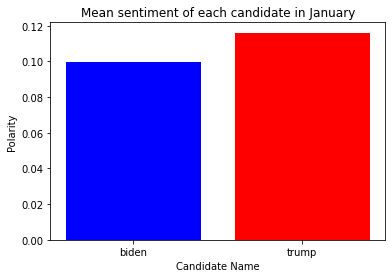

In [26]:
jan1=jan.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
jan1.drop([0],inplace=True)
plt.bar(jan1['about'], jan1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in January")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# FEB

In [27]:
data_text = feb[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('feb.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 85

In [28]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [29]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,debate,said,said,Democratic,Democratic
1,South,House,Democratic,candidates,Democrats
2,Democratic,campaign,Sanders,—,said
3,Carolina,Sanders,two,CBS,(CNN)
4,CBS,Trump,people,Democrats,campaign
5,primary,Democratic,Trump,said,Senate
6,new,Trump's,Republican,debate,presidential
7,Democrats,President,state's,told,new
8,according,--,Party,voters,Sen.
9,presidential,coronavirus,told,Trump,would


In [30]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [31]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [32]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,getting,seats,sen,south,gupta
1,iphone,democrats,speaking,carolina,sanjay
2,magsafe,gain,minutes,democratic,kemp
3,feature,net,16,debate,asymptomatic
4,started,chance,approximate,sanders,cooper
5,12,least,elizabeth,biden,gov
6,best,given,tracked,primary,learned
7,new,senate,klobuchar,voters,brian
8,california,in,amy,cbs,dr
9,biden,underdogs,followed,campaign,spread


Text(0.5, 0, 'Candidate Name')

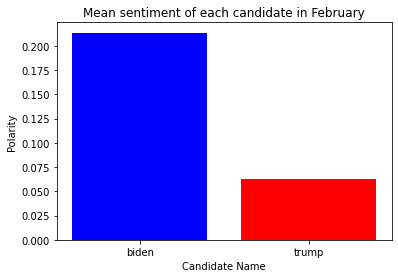

In [33]:
feb1=feb.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
feb1.drop([0],inplace=True)
plt.bar(feb1['about'], feb1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in February")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# MAR

In [34]:
data_text = mar[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('mar.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 77

In [35]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [36]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,CNN,said,Biden,coronavirus,Trump
1,said,coronavirus,said,said,coronavirus
2,coronavirus,Senate,President,Senate,Biden
3,told,economic,Republican,Trump,said
4,Democrats,President,News,House,President
5,money,Biden,CBS,Democratic,--
6,Republicans,Democratic,Trump,voting,announced
7,voting,American,coronavirus,Democrats,Broncos
8,health,House,Democratic,would,U.S.
9,Senate,businesses,election,Biden,vote


In [37]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [38]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [39]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,iphone,senate,biden,same,really
1,started,republicans,tuesday,viewers,walden
2,magsafe,stimulus,delegates,wall,treasure
3,feature,rolled,primary,cable,smart
4,12,economic,sanders,coronavirus,he
5,best,aid,super,cnn,understand
6,getting,intended,joe,news,think
7,new,critical,democratic,said,coming
8,race,deliver,race,66,re
9,baltimore,trillion,vote,message,we


Text(0.5, 0, 'Candidate Name')

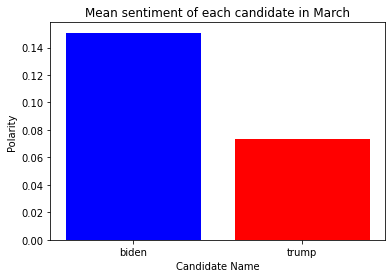

In [40]:
mar1=mar.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
mar1.drop([0],inplace=True)
plt.bar(mar1['about'], mar1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in March")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# APR

In [41]:
data_text = apr[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('apr.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 90

In [42]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [43]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,states,Trump,said,Trump,health
1,House,said,Democratic,Biden,Trump
2,told,Democratic,CBS,said,said
3,White,state,campaign,Democratic,United
4,coronavirus,Senate,coronavirus,black,coronavirus
5,Trump,coronavirus,Trump,state,people
6,antibody,government,New,Pennsylvania,Democratic
7,said,President,House,coronavirus,public
8,President,White,say,Democrats,States
9,saw,administration,York,absentee,protests


In [44]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [45]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [46]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,permission,73,trump,driven,protests
1,edit,hospitalized,democrats,states,june
2,article,place,democratic,stay,society
3,city,across,campaign,health,racism
4,york,restrictions,said,home,say
5,top,covid,biden,public,overall
6,there,19,white,dakota,now
7,new,000,president,orders,poll
8,car,new,black,decisions,cnn
9,feb,cuomo,senate,governors,24


Text(0.5, 0, 'Candidate Name')

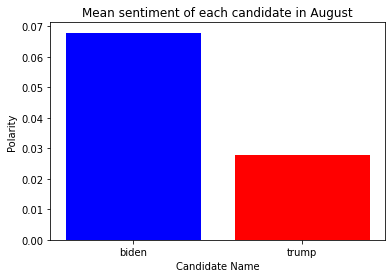

In [47]:
apr1=apr.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
apr1.drop([0],inplace=True)
plt.bar(apr1['about'], apr1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in August")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# MAY

In [48]:
data_text = may[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('may.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 81

In [49]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [50]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,Trump,Trump,Trump,--,said
1,campaign,House,coronavirus,state,Biden
2,Democratic,said,voters,Sen.,Trump
3,President,President,New,Trump,President
4,House,Republican,Carolina,Democratic,state
5,Biden,Democratic,going,primary,would
6,said,Democrats,said,Senate,House
7,(CNN),told,North,GOP,coronavirus
8,women,would,new,coronavirus,told
9,coronavirus,ballots,President,said.,Democrats


In [51]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [52]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [53]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,bash,magsafe,trump,carolina,campaign
1,dana,feature,said,north,ellis
2,but,iphone,state,convention,sex
3,time,12,president,four,trump
4,unemployment,started,house,away,legalized
5,hassett,best,biden,gov,marriage
6,rate,getting,democrats,thing,pedophilia
7,double,new,republican,carried,bestiality
8,may,hampshire,national,tell,same
9,state,sanders,mask,played,2019


Text(0.5, 0, 'Candidate Name')

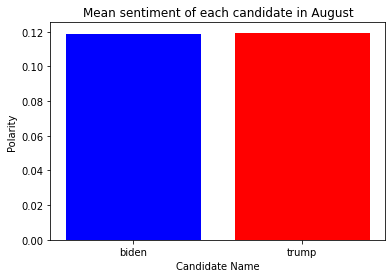

In [54]:
may1=may.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
may1.drop([0],inplace=True)
plt.bar(may1['about'], may1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in August")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# JUN

In [55]:
data_text = jun[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('jun.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 76

In [56]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [57]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,House,Democratic,said,Trump,Trump
1,said,Trump,Biden,Democratic,said
2,Trump,state,Democratic,said,voting
3,White,Biden,voting,Biden,Senate
4,would,presidential,New,President,women
5,state,primary,absentee,Senate,—
6,Senate,Democrats,mail-in,primary,National
7,Democrats,said,primary,campaign,House
8,(CNN),Republican,election,Donald,President
9,President,Senate,NRA,people,two


In [58]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [59]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [60]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,trump,delegates,cuomo,breakfast,white
1,primary,charlotte,andrew,enemies,house
2,biden,pageantry,reopen,faith,judd
3,democratic,meetings,and,allies,spokesman
4,president,24,homey,pelosi,deere
5,state,aug,matilda,know,cnn
6,said,assemble,status,going,services
7,republicans,before,deaths,arthur,manchurian
8,000,300,gives,inappropriate,brig
9,senate,speeches,undated,soon,updated


Text(0.5, 0, 'Candidate Name')

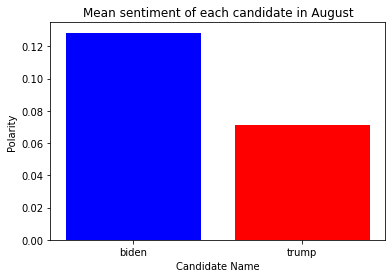

In [61]:
jun1=jun.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
jun1.drop([0],inplace=True)
plt.bar(jun1['about'], jun1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in August")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# JULY

In [62]:
data_text = jul[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('jul.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 96

In [63]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [64]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,said,President,Trump,said,Trump
1,Trump,Trump,campaign,Trump,Republican
2,campaign,Vice,:,House,House
3,political,said,said,Republican,said
4,say,Pence,Republican,Republicans,ballots
5,Democratic,presidential,Trump's,told,White
6,coronavirus,Donald,election,executive,Republicans
7,supporters,federal,President,people,election
8,President,Republican,people,official,GOP
9,presidential,Mike,Donald,orders,according


In [65]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [66]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [67]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,iphone,senate,mcenany,trump,vice
1,started,executive,comments,election,pence
2,feature,democrats,trump,voting,president
3,magsafe,orders,added,mail,lacrosse
4,getting,house,think,campaign,wisconsin
5,12,white,donald,republican,mike
6,best,republicans,mainstream,ballots,speech
7,new,said,sense,tillis,didn
8,debate,meadows,equally,in,dana
9,video,people,sharpton,2020,mishandled


Text(0.5, 0, 'Candidate Name')

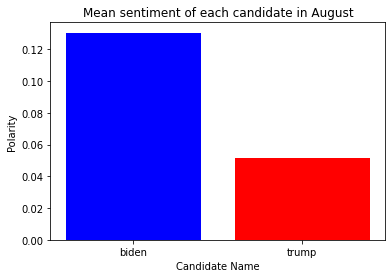

In [68]:
jul1=jul.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
jul1.drop([0],inplace=True)
plt.bar(jul1['about'], jul1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in August")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# AUG

In [69]:
data_text = aug[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('aug.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 162

In [70]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [71]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,Trump,said,Trump,Trump,Trump
1,Democratic,Republican,said,Democratic,Democrats
2,President,Democratic,Democratic,election,--
3,said,Trump,would,said,Biden
4,National,Biden,ballot,House,political
5,million,National,absentee,million,coronavirus
6,Biden,voters,National,–,Democratic
7,A18-49:,President,campaign,Postal,like
8,political,week,President,A18-49:,Americans
9,Republican,Joe,request,National,said


In [72]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [73]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [74]:

get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,iphone,trump,history,hospitalized,results
1,magsafe,biden,stelter,73,46th
2,started,convention,competition,restrictions,projects
3,best,said,never,across,resultsjoe
4,feature,democratic,fox,place,statepresidential
5,12,mail,seen,covid,become
6,getting,president,like,19,presidential
7,new,in,news,000,us
8,virtual,democrats,govern,new,biden
9,dean,campaign,majority,vaccine,cnn


Text(0.5, 0, 'Candidate Name')

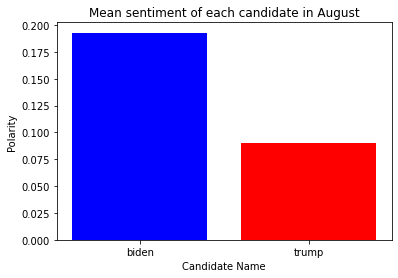

In [75]:
aug1=aug.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
aug1.drop([0],inplace=True)
plt.bar(aug1['about'], aug1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in August")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# SEP

In [76]:
data_text = sep[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('sep.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 112

In [77]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [78]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,said,Trump,Court,Trump,Senate
1,Trump,said,Supreme,told,Court
2,Supreme,political,Trump,said,Supreme
3,Court,would,Senate,Biden,presidential
4,Democrats,Democratic,Democratic,Democratic,Biden
5,Biden,President,President,Republicans,Democrats
6,election,New,said,House,Trump
7,would,Supreme,would,—,election
8,Republicans,ads,vote,politics,Democratic
9,Democratic,—,nominee,Supreme,President


In [79]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [80]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [81]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,greenspan,court,mail,margins,ads
1,never,supreme,absentee,senate,political
2,anything,trump,voting,presidential,facebook
3,crisis,justice,in,90,let
4,seen,president,postal,differences,users
5,ve,election,service,biden,see
6,covid,republicans,guilfoyle,races,people
7,like,nominee,universal,91,social
8,vaccine,said,officials,leading,issue
9,polls,senate,vote,lineup,features


Text(0.5, 0, 'Candidate Name')

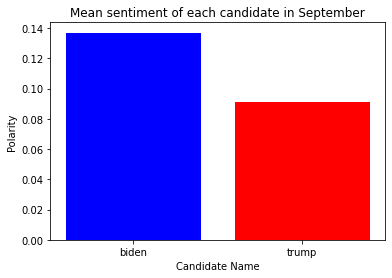

In [82]:
sep1=sep.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
sep1.drop([0],inplace=True)
plt.bar(sep1['about'], sep1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in September")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# OCT

In [83]:
data_text = oct[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('oct.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 281

In [84]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [85]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,said,Trump,Trump,House,Trump
1,Biden,campaign,Biden,Trump,said
2,Trump,Biden,President,White,President
3,Republicans,President,Joe,said,House
4,Democrats,said,said,Republican,Biden
5,presidential,election,Democrats,told,Supreme
6,Republican,Joe,News,Democrats,White
7,voters,--,Democratic,campaign,campaign
8,Democratic,Donald,president,political,election
9,President,presidential,Election,President,told


In [86]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [87]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [88]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,nan,degrees,iphone,hospitalized,trump
1,zuckerberg,transport,magsafe,restrictions,biden
2,exceed,pfizer,12,73,president
3,exactly,94,feature,000,election
4,exaggerated,vaccine,best,place,cnn
5,exaggerating,keep,started,across,said
6,examination,bright,getting,19,house
7,examined,thanksgiving,new,covid,campaign
8,example,fda,hampshire,new,joe
9,exceedingly,guidelines,arizona,positive,democrats


Text(0.5, 0, 'Candidate Name')

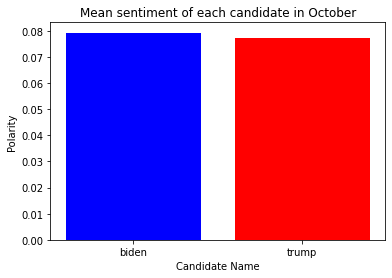

In [89]:
oct1=oct.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
oct1.drop([0],inplace=True)
plt.bar(oct1['about'], oct1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in October")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

# NOV

In [90]:
data_text = nov[['Summary']]
data_text = data_text.astype('str')
for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['Summary'] = [word for word in data_text.iloc[idx]['Summary'].split(' ') if word.lower() not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)))

#save data because it takes very long to remove stop words
pickle.dump(data_text, open('nov.dat', 'wb'))

#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];

#number of topics we will cluster for: 10
num_topics =5;

id2word = gensim.corpora.Dictionary(train_headlines)

corpus = [id2word.doc2bow(text) for text in train_headlines]

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

c = 0 / 91

In [91]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [92]:
get_lda_topics(lda, num_topics)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,Biden,Trump,Trump,Trump,Biden
1,Trump,Biden,President,Biden,House
2,House,election,Biden,campaign,Joe
3,said,—,campaign,Georgia,election
4,Joe,Georgia,Republican,Republican,said
5,—,President,House,Democrats,—
6,White,Republican,White,President,Trump
7,campaign,said,said,voters,percent
8,Obama,would,election,Joe,White
9,transition,state,News,vote,President


In [93]:
#the count vectorizer needs string inputs, not array, so I join them with a space.
train_headlines_sentences = [' '.join(text) for text in train_headlines]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

#fit the model
model.fit(xtfidf_norm)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [94]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [95]:
get_nmf_topics(model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,iphone,biden,kaitlan,votes,grant
1,getting,trump,ask,percent,that
2,magsafe,president,jiang,electoral,nih
3,feature,campaign,press,biden,wuhan
4,started,said,weijia,49,lab
5,best,house,answer,trump,work
6,12,transition,reporter,college,year
7,new,election,question,georgia,true
8,journalists,the,china,currently,scott
9,data,white,questions,vote,lightly


Text(0.5, 0, 'Candidate Name')

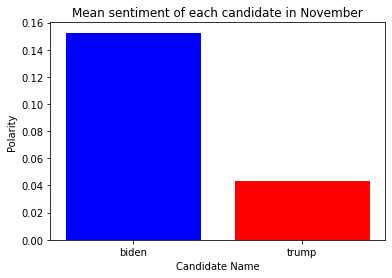

In [96]:
nov1=nov.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
nov1.drop([0],inplace=True)
plt.bar(nov1['about'], nov1['Polarity'], color=['blue', 'red'])
plt.title("Mean sentiment of each candidate in November")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

Text(0.5, 0, 'Candidate Name')

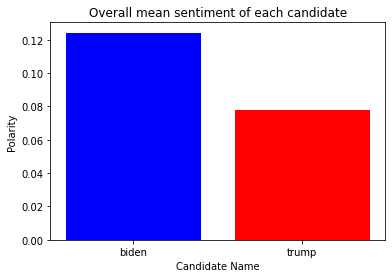

In [97]:
overall=df.groupby('about')['Polarity'].mean().to_frame(name='Polarity').reset_index()
overall.drop([0],inplace=True)
plt.bar(overall['about'], overall['Polarity'], color=['blue', 'red'])
plt.title("Overall mean sentiment of each candidate")
plt.ylabel('Polarity')
plt.xlabel('Candidate Name')

In [98]:
absolutes = df.groupby('Media')['biden','trump','democrats','republicans'].sum().astype(int)
display(absolutes)

,biden,trump,democrats,republicans
Media,,,,
CBS News,57,72,1,8
CNN News,44,140,5,80
Fox News,24,73,8,1
NBC News,43,60,2,4


In [99]:
totals = df.groupby('Media').size()
relatives = 100 * absolutes.divide(totals, axis=0)
display(relatives)

,biden,trump,democrats,republicans
Media,,,,
CBS News,15.039578,18.997361,0.263852,2.110818
CNN News,7.719298,24.561404,0.877193,14.035088
Fox News,12.631579,38.421053,4.210526,0.526316
NBC News,22.631579,31.578947,1.052632,2.105263


In [100]:
channel_stats = pd.DataFrame({
    'relevant': df.groupby('Media').relevant.sum().astype(int),
    'total': df.groupby('Media').size()
})
channel_stats['percentage_relevant'] = (100*channel_stats.relevant/channel_stats.total).round(2)
channel_stats.sort_values('percentage_relevant', ascending=False)

,relevant,total,percentage_relevant
Media,,,
Fox News,98,190,51.58
NBC News,88,190,46.32
CNN News,235,570,41.23
CBS News,117,379,30.87


# Visualizations

In [101]:
import matplotlib.pyplot as plt
import math
def plot_channel_stats(stats, topics, channels, fig_height=8, y_center=False, title=None):
    """
    Plots bar charts for the given channel stats.
    A separate subplot is generated for each given topic.
    """
    fig, axes = plt.subplots(nrows=int(math.ceil(topics.shape[0]/2)), ncols=2, figsize=(8,fig_height))
    fig.subplots_adjust(hspace=.5)
    
    for i, topic in topics.iterrows():
        ax = fig.axes[i]
        
        # If requested, center all axes around 0
        if y_center:
            # Calculate the approximate amplitude of the given stats values
            amplitude = math.ceil(stats.abs().values.max()*10)/10
            ax.set_ylim(-amplitude, amplitude)
        
        # If we have negative values, grey out the negative space for better contrast
        if stats.values.min() < 0:
            ax.axhspan(0, ax.get_ylim()[0], facecolor='0.2', alpha=0.15)
        
        color = channels.sort_values('title').color
        ax.bar(range(len(stats.index)), stats[topic.slug], tick_label=stats.index, color=color, align='center')
        ax.set_title(topic.title, size=11)
        
    # Hide potential last empty subplot
    if topics.shape[0] % 2:
        fig.axes[-1].axis('off')

    # Optional title at the top
    if title is not None:
        multiline = '\n' in title
        y = 1. if multiline else .96
        plt.suptitle(title, size=14, y=y)
        
    plt.show()

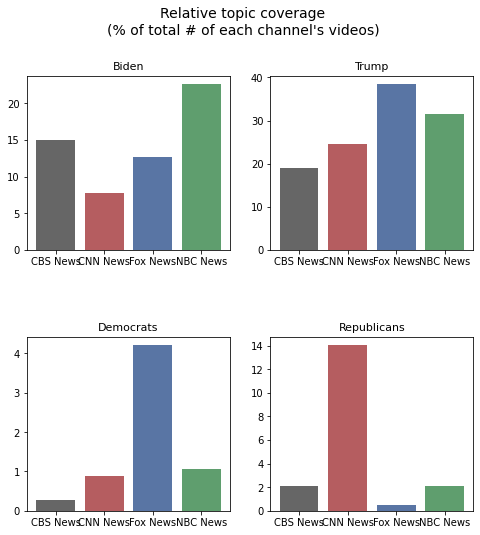

In [102]:
plot_channel_stats(relatives,topics,channels, title='Relative topic coverage\n(% of total # of each channel\'s videos)')

In [103]:
articles= df[['Media','Title','Polarity','article_id']]
articles.head()

,Media,Title,Polarity,article_id
0,CBS News,"Trump abruptly ends '60 Minutes' interview, ta...",0.197222,0
1,CBS News,Trump Taunts Lesley Stahl of ‘60 Minutes’ Afte...,0.115000,1
2,CBS News,Trump abruptly ends '60 Minutes' interview bef...,-0.091319,2
3,CBS News,"Barack Obama speaks out on politics, the presi...",-0.022222,3
4,CBS News,CBS's New Star Trek Series Mirrors American Po...,-0.010714,4


In [104]:
#Some articles with negative sentiment
df.sort_values('Polarity')[['Media', 'Title','Polarity']].head()

,Media,Title,Polarity
543,CNN News,SE Cupp: Making fun of seniors seems like bad ...,-0.500000
1200,CBS News,House Democrats unveil police reform bill amid...,-0.433333
685,NBC News,7 Wisconsin coronavirus infections linked to E...,-0.333333
323,Fox News,California election officials tell voters not ...,-0.323333
707,NBC News,Colorado sues Postal Service over 'misinformat...,-0.320000


In [105]:
#Some articles with positive sentiment
df.sort_values('Polarity', ascending=False)[['Media', 'Title','Polarity']].head()

,Media,Title,Polarity
1144,CBS News,Democrats try to stop Sanders' momentum in fie...,0.568182
1173,CBS News,Harris accepts VP nomination after Obama deliv...,0.568182
1223,CBS News,Pence and Harris clash over virus at vice pres...,0.568182
1142,CBS News,House Democrats grill postmaster general over ...,0.568182
1227,CBS News,Impeachment trial: Democrats lay out timeline ...,0.568182


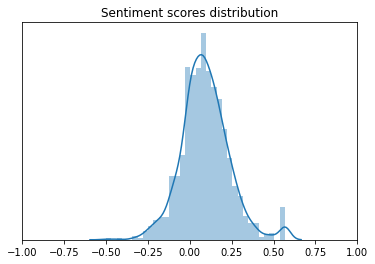

In [106]:
import seaborn as sns
sns.distplot(df.Polarity, axlabel=False, ax=plt.gca())
plt.title('Sentiment scores distribution')
plt.gca().get_yaxis().set_visible(False)
plt.xlim(-1,1)
plt.show()

Topic,biden,trump,democrats,republicans
Media,,,,
CBS News,0.147562,0.133769,0.15,0.137265
CNN News,0.111417,0.0828394,0.189636,0.0899028
Fox News,0.057893,0.0377862,0.0337269,0.0232955
NBC News,0.143478,0.0842039,0.105357,0.156315


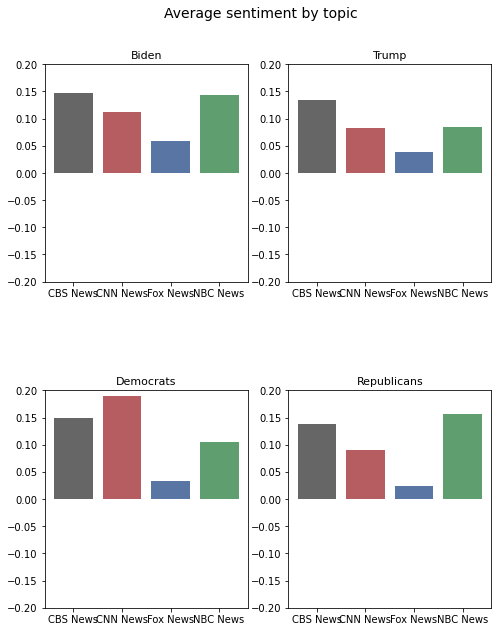

In [107]:
scores = pd.DataFrame(index=channels.sort_values('title').title, columns=topics.slug, )
for channel, group in df.groupby('Media'):
    for topic in topics.slug:
        scores.loc[channel, topic] = group[group[topic]].Polarity.mean()
scores = scores.rename_axis('Topic', axis=1)
scores = scores.rename_axis('Media', axis=0)
display(scores)
plot_channel_stats(scores, topics, channels, fig_height=10, y_center=True, title='Average sentiment by topic')

In [108]:
def plot_compressed_channel_stats(stats, color=None, y_center=False, title=None):
    """
    Similar to plot_channel_stats except everything is represented
    in a single plot (i.e. no subplots).
    """
    plt.figure(figsize=(6,4))
    ax = plt.gca()
    
    # If requested, center all axes around 0
    if y_center:
        # Calculate the approximate amplitude of the given stats values
        amplitude = math.ceil(stats.abs().values.max()*10)/10
        ax.set_ylim(-amplitude, amplitude)

    # If we have negative values, grey out the negative space
    # for better contrast
    if stats.values.min() < 0:
        ax.axhspan(0, ax.get_ylim()[0], facecolor='0.2', alpha=0.15)
        
    # The actual plot
    stats.plot(kind='bar', color=color, width=0.6, ax=ax)
    
    # Presentation cleanup
    plt.xlabel('')
    plt.xticks(rotation=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Optional title at the top
    if title is not None:
        plt.title(title)

    plt.show()

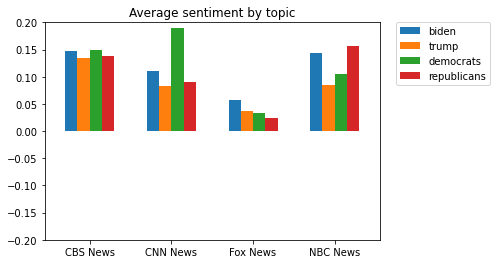

In [109]:
plot_compressed_channel_stats(scores, y_center=True, title='Average sentiment by topic')

In [110]:
from __future__ import division
import math
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
def plot_sentiment_series(videos, topics, channels, start_date=None, title=None):
    """
    Plot linear timeseries of sentiment scores for the given videos:
    One separate subplot is generated for each topic. Each subplot
    has one timeseries for each channel, and one timeseries for the
    average values across all channells.
    """
    fig, axes = plt.subplots(nrows=topics.shape[0], ncols=1, figsize=(8,4*topics.shape[0]))
    fig.subplots_adjust(hspace=.3)
    
    # Resample rule: 2-week buckets
    resample_rule = '2W'
    
    # Calculate the approximate amplitude of the given sentiment values
    amplitude = math.ceil(videos.Polarity.abs().max()*10)/10
    
    for i, topic in topics.reset_index().iterrows():
        ax = fig.axes[i]
        # Grey out the negative sentiment area
        ax.axhspan(0, -1, facecolor='0.2', alpha=0.15)

        # Plot a timeseries for the average sentiment across all channels
        topic_mask = videos[topic.slug]
        if start_date is not None:
            topic_mask = topic_mask & (videos.Date >= start_date)
        ts = videos[topic_mask].set_index('Date').resample(resample_rule)['Polarity'].mean().interpolate()
        sns.tsplot(ts, ts.index, color='#fcef99', linewidth=6, ax=ax)
        
        # Plot a separate time-series for each channel
        for _, channel in channels.iterrows():
            channel_mask = topic_mask & (videos.Media==channel.title)
            ts = videos[channel_mask].set_index('Date').resample(resample_rule)['Polarity'].mean().interpolate()
            if len(ts) > 1:
                sns.tsplot(ts, ts.index, color=channel['color'], linewidth=1, ax=ax)

        # Format x-axis labels as dates
        xvalues = ax.xaxis.get_majorticklocs()
        xlabels = [datetime.utcfromtimestamp(x/1e9).strftime("%Y.%m") for x in xvalues]
        ax.set_xticklabels(xlabels)

        # A little extra presentation cleanup
        ax.set_xlabel('')
        ax.set_title(topic['title'], size=11)
        ax.set_ylim(-amplitude,amplitude)

        # Add legend
        handles = [Patch(color='#fcef99', label='Average')]
        for _, channel in channels.iterrows():
            handles.append(Patch(color=channel['color'], label=channel['title']))
        ax.legend(handles=handles, fontsize=8)

    # Optional title at the top
    if title is not None:
        plt.suptitle(title, size=14, y=.92)
        
    plt.show()

C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\aslam\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in 

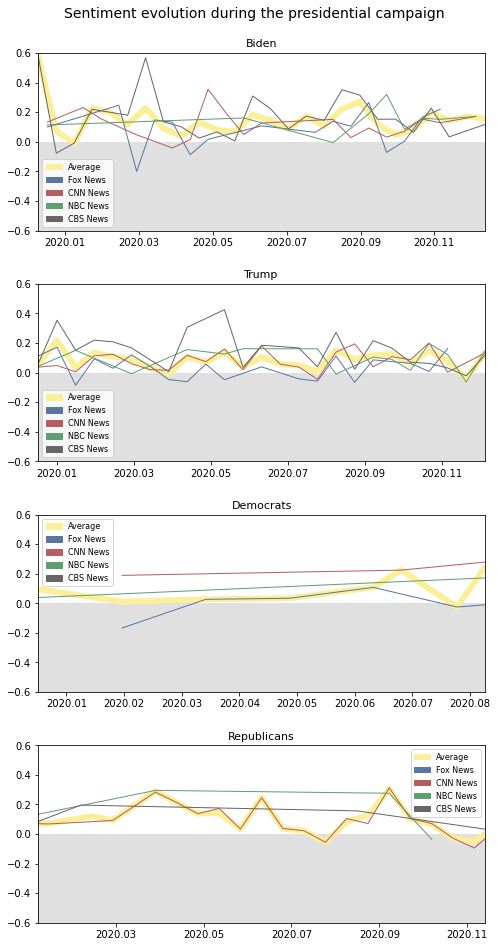

In [111]:
plot_sentiment_series(df, topics, channels, start_date=datetime(2020, 1, 1), title='Sentiment evolution during the presidential campaign')